# Rossmann Store Sales

<hr style="border: solid rgb(255,0,0) 0.0px; background-color: rgb(255,0,0);height: 5.0px;"/>
<font color='red' size=5>
    Requires some understanding of time-series analysis
    <br/>    
    Training data: 2013.01.01$-$2015.07.31
    <br/>
    Test data: 2015.08.01$-$2015.09.17
</font>
<hr style="border: solid rgb(255,0,0) 0.0px; background-color: rgb(255,0,0);height: 5.0px;"/>

In [1]:
`import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../../datasets/rossmann-store-sales/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../../datasets/rossmann-store-sales/rossmann-store-sales.zip
../../datasets/rossmann-store-sales/sample_submission.csv
../../datasets/rossmann-store-sales/store.csv
../../datasets/rossmann-store-sales/test.csv
../../datasets/rossmann-store-sales/train.csv


## Load the data

In [5]:
!ls -lath ../../datasets/rossmann-store-sales/*.csv

-rw-r--r-- 1 sandm sandm  37M Dez 11 03:57 ../../datasets/rossmann-store-sales/train.csv
-rw-r--r-- 1 sandm sandm 311K Dez 11 03:57 ../../datasets/rossmann-store-sales/sample_submission.csv
-rw-r--r-- 1 sandm sandm  44K Dez 11 03:57 ../../datasets/rossmann-store-sales/store.csv
-rw-r--r-- 1 sandm sandm 1,4M Dez 11 03:57 ../../datasets/rossmann-store-sales/test.csv


In [21]:
df = pd.read_csv('../../datasets/rossmann-store-sales/train.csv', \
                 infer_datetime_format=True, parse_dates=['Date'], \
                 dtype={'StateHoliday':str})

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null datetime64[ns]
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [23]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [17]:
df.StateHoliday.unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [26]:
df.Store.nunique()

1115

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import random
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, 20)]
random.shuffle(colors)

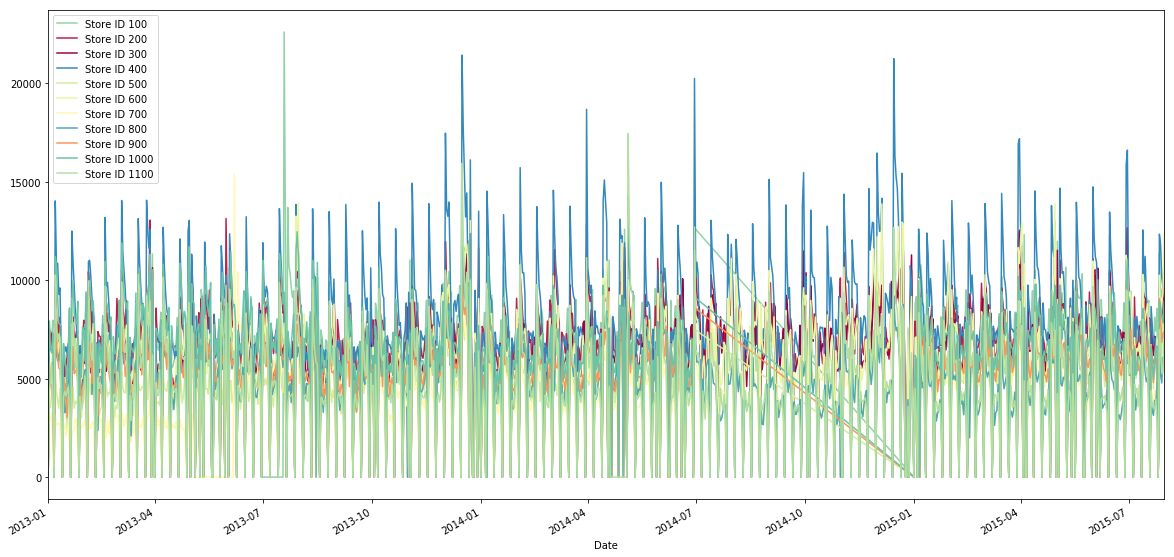

In [49]:
fig, ax = plt.subplots(1,1, figsize=[20,10])

m=0
for n, grp in df[df.Store.isin(list(range(0,1200,100)))].sort_values('Date').groupby('Store'):
    grp.plot(x='Date', y='Sales', color=colors[m], ax=ax, label=f'Store ID {n}')
    m += 1

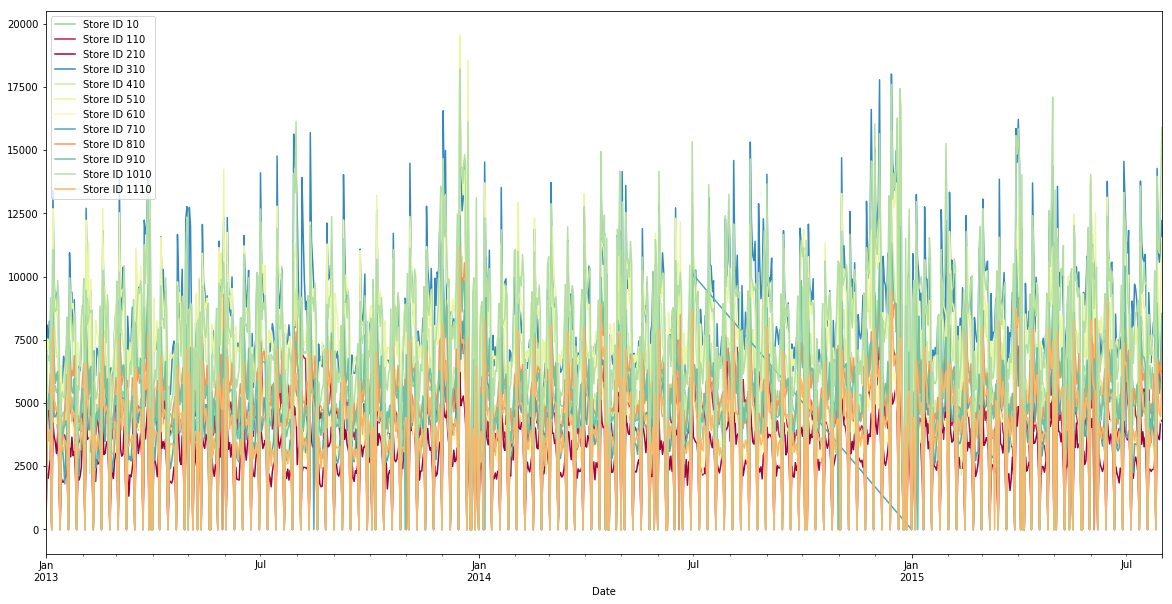

In [53]:
fig, ax = plt.subplots(1,1, figsize=[20,10])

m=0
for n, grp in df[df.Store.isin(list(range(10,1200,100)))].sort_values('Date').groupby('Store'):
    grp.plot(x='Date', y='Sales', color=colors[m], ax=ax, label=f'Store ID {n}')
    m += 1


(16071, 16435)

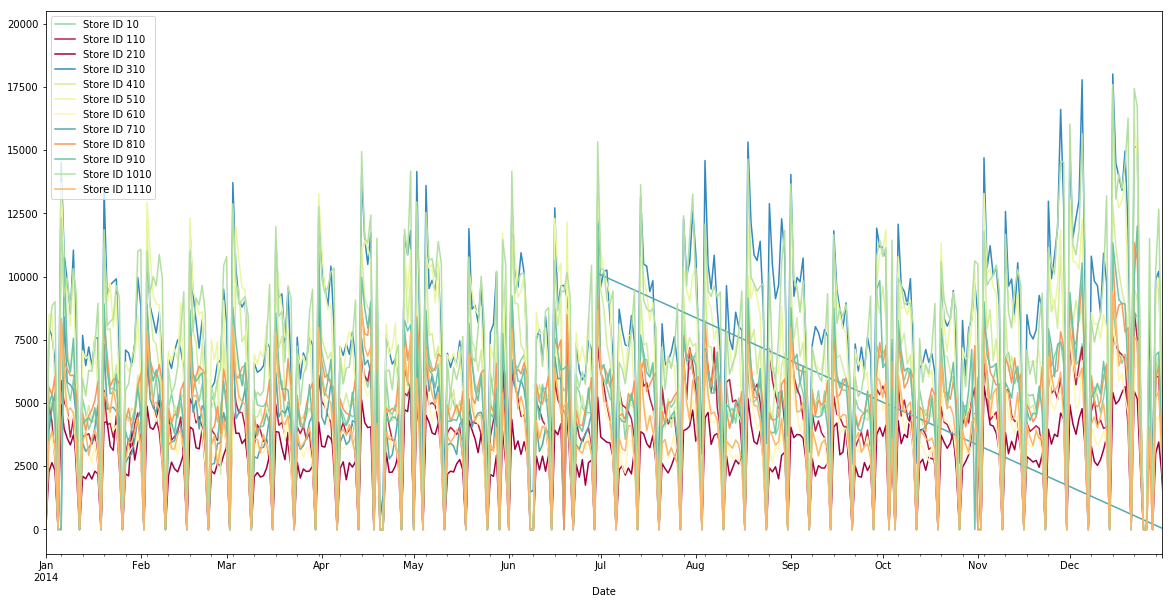

In [54]:
fig, ax = plt.subplots(1,1, figsize=[20,10])

m=0
for n, grp in df[df.Store.isin(list(range(10,1200,100)))].sort_values('Date').groupby('Store'):
    grp.plot(x='Date', y='Sales', color=colors[m], ax=ax, label=f'Store ID {n}')
    m += 1
ax.set_xlim('2014-01-01','2014-12-31')

(16071, 16251)

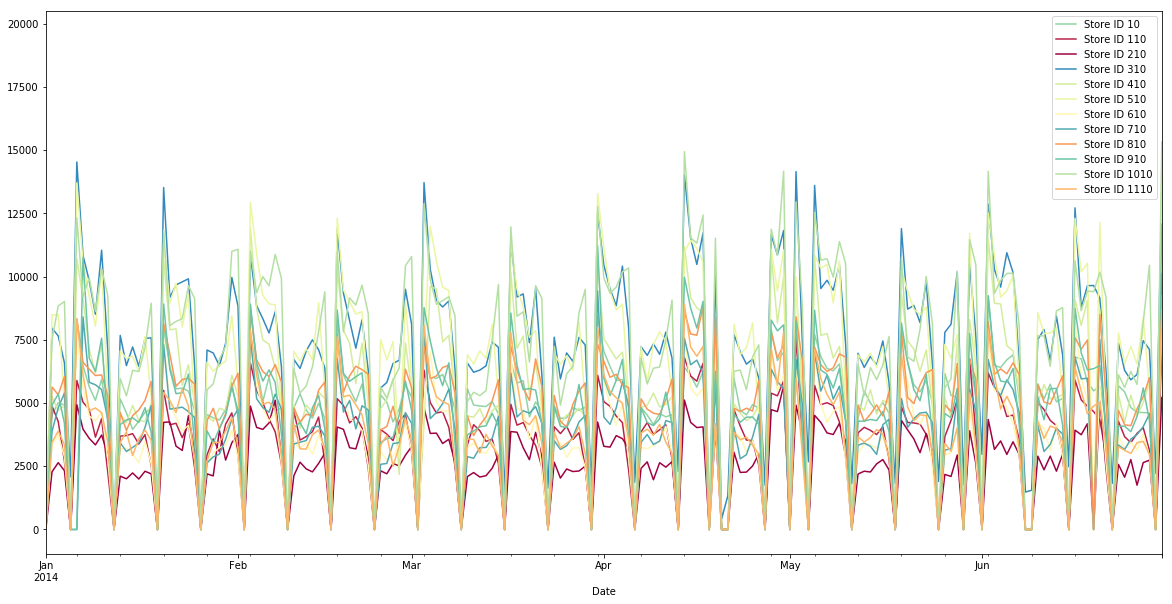

In [55]:
fig, ax = plt.subplots(1,1, figsize=[20,10])

m=0
for n, grp in df[df.Store.isin(list(range(10,1200,100)))].sort_values('Date').groupby('Store'):
    grp.plot(x='Date', y='Sales', color=colors[m], ax=ax, label=f'Store ID {n}')
    m += 1
ax.set_xlim('2014-01-01','2014-06-30')

(16222, 16251)

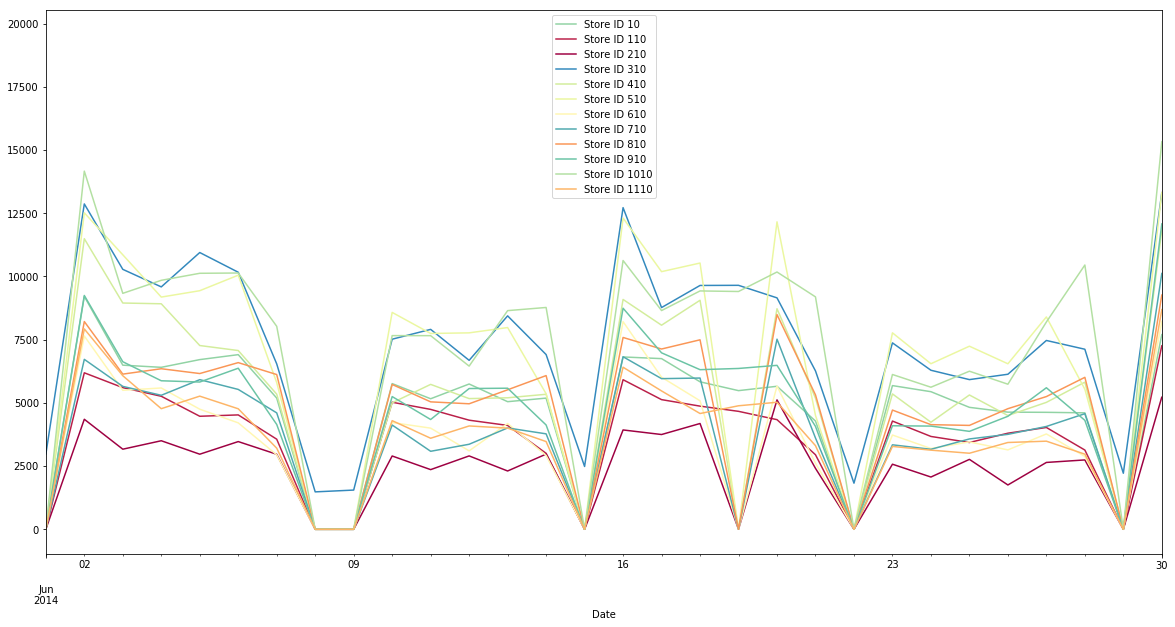

In [56]:
fig, ax = plt.subplots(1,1, figsize=[20,10])

m=0
for n, grp in df[df.Store.isin(list(range(10,1200,100)))].sort_values('Date').groupby('Store'):
    grp.plot(x='Date', y='Sales', color=colors[m], ax=ax, label=f'Store ID {n}')
    m += 1
ax.set_xlim('2014-06-01','2014-06-30')

### Test data

In [57]:
df_tst = pd.read_csv('../../datasets/rossmann-store-sales/test.csv', \
                 infer_datetime_format=True, parse_dates=['Date'], \
                 dtype={'StateHoliday':str})

In [59]:
df_tst.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [60]:
df_tst.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


In [61]:
df_tst.Date.min(),df_tst.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

In [62]:
df.Date.min(),df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

Training data: 2013.01.01$-$2015.07.31
<br/>
Test data: 2015.08.01$-$2015.09.17